<a href="https://colab.research.google.com/github/sjitheshr/computer_vision/blob/main/DL_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
os.chdir('/content/drive/MyDrive/computer_vision')

In [6]:
pwd

'/content/drive/MyDrive/computer_vision'

In [7]:
import tensorflow as tf

In [87]:
mnist_data = tf.keras.datasets.mnist

In [101]:
(X_train, Y_train), (X_test, Y_test) = mnist_data.load_data()

In [102]:
X_train.shape

(60000, 28, 28)

In [103]:
Y_train.shape

(60000,)

In [105]:
Y_train[0]

5

In [106]:
import matplotlib.pyplot as plt

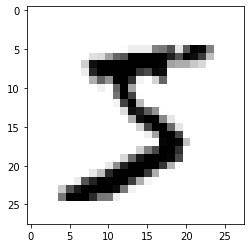

In [107]:
plt.imshow(X_train[0],cmap='binary')

In [108]:
Y_train[2]

4

In [109]:
import seaborn as sns

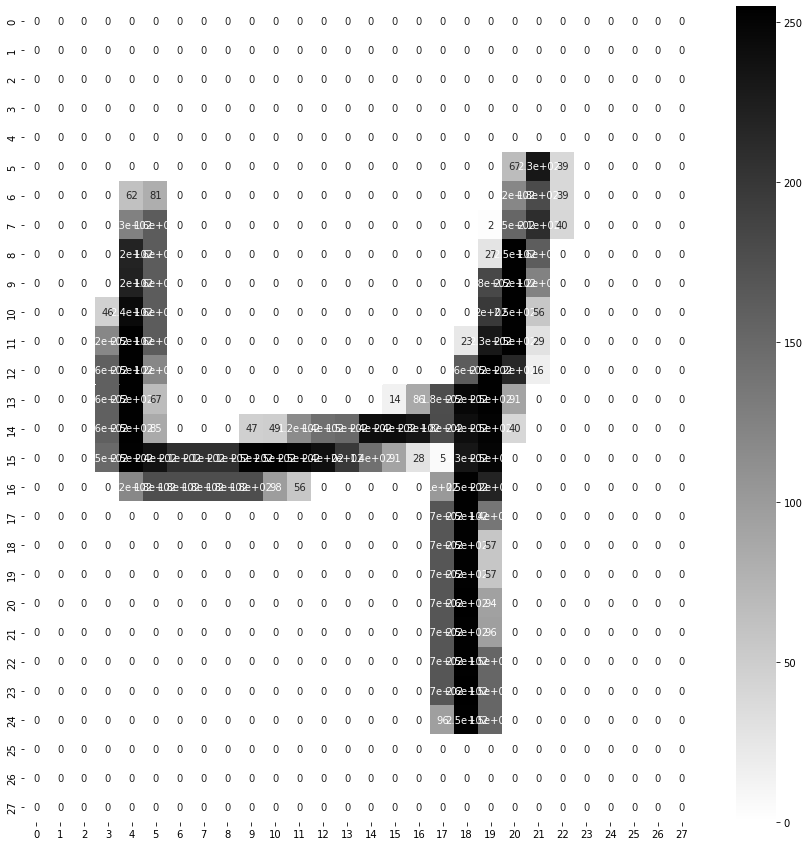

In [110]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[2], annot=True, cmap='binary')

In [97]:
X_train = X_train/255.
X_test = X_test/255.

In [111]:
X_valid, X_train = X_train[:5000], X_train[5000:]
Y_valid, Y_train = Y_train[:5000], Y_train[5000:]

In [112]:
X_train.shape

(55000, 28, 28)

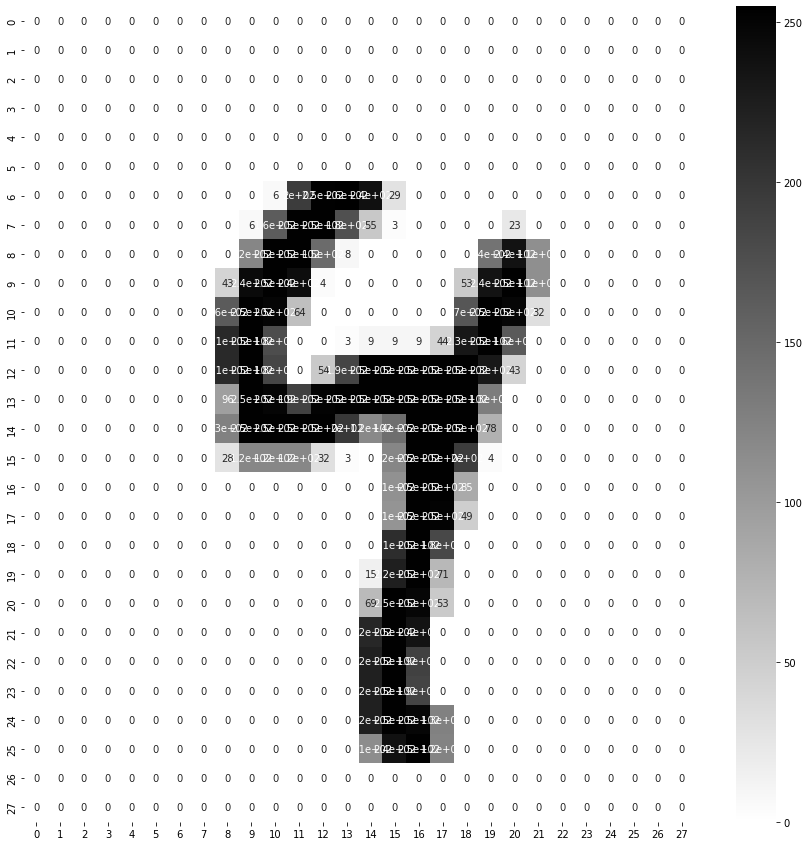

In [113]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[2], annot=True, cmap='binary')

In [114]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28], name ="inputlayer"),
          tf.keras.layers.Dense(300,activation='relu', name ="hidenlayer1"),
          tf.keras.layers.Dense(100,activation='relu', name ="hidenlayer2"),
          tf.keras.layers.Dense(10,activation='softmax', name ="outputlayer")
]

In [115]:
model1 = tf.keras.models.Sequential(LAYERS)

In [116]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hidenlayer1 (Dense)         (None, 300)               235500    
                                                                 
 hidenlayer2 (Dense)         (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [117]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "adam"
METRICS = ["accuracy"]

In [118]:
model1.compile(loss = LOSS_FUNCTION, optimizer = OPTIMIZER, metrics = METRICS)

In [119]:
model1.layers

In [120]:
model1.layers[0]

In [121]:
model1.layers[0].name

'inputlayer'

In [122]:
hidden1 = model1.layers[1]

In [123]:
w, b = hidden1.get_weights()

In [124]:
w #weight

array([[-0.03600109, -0.03006738,  0.01234534, ...,  0.06472714,
        -0.01136163,  0.01859548],
       [-0.00877431, -0.00446668,  0.02944085, ...,  0.0471541 ,
        -0.02016748,  0.06033894],
       [-0.02493011,  0.03807195, -0.00018472, ...,  0.02375643,
         0.04629561, -0.06165749],
       ...,
       [ 0.01682995, -0.00349432, -0.02792322, ...,  0.01992939,
        -0.0217911 , -0.01027999],
       [ 0.01916338, -0.0531403 ,  0.06919967, ...,  0.02081581,
        -0.06261767,  0.0554309 ],
       [ 0.06668103,  0.06046228, -0.02923355, ...,  0.01399341,
         0.04774684,  0.05034956]], dtype=float32)

In [125]:
b #bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [141]:
EPOCHS=10
VALIDATION_SET = (X_valid, Y_valid)

In [142]:
history = model1.fit(X_train,Y_train, epochs = EPOCHS, validation_data = VALIDATION_SET)

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1160 - accuracy: 0.9698 - val_loss: 0.1494 - val_accuracy: 0.9652
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1092 - accuracy: 0.9716 - val_loss: 0.1497 - val_accuracy: 0.9648
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0967 - accuracy: 0.9755 - val_loss: 0.1748 - val_accuracy: 0.9668
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0902 - accuracy: 0.9770 - val_loss: 0.1432 - val_accuracy: 0.9708
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0894 - accuracy: 0.9778 - val_loss: 0.1896 - val_accuracy: 0.9632
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0841 - accuracy: 0.9794 - val_loss: 0.1668 - val_accuracy: 0.9694
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0710 - accuracy: 0.9822 - val_loss: 0.1795 - val_accuracy:

In [132]:
prediction = model1.predict(X_test[0])

1/1 [==============================] - 0s 16ms/step


In [133]:
prediction

array([[7.5104733e-24, 1.6014126e-06, 3.7595954e-11, 1.2112045e-07,
        1.7029698e-09, 8.5330158e-15, 5.4060821e-32, 9.9999523e-01,
        6.6134154e-11, 3.0502129e-06]], dtype=float32)

In [134]:
Y_test[0]

7

In [135]:
import numpy as np

In [136]:
np.argmax(prediction)

7

In [143]:
X_predict = model1.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [144]:
X_predict

array([[2.9829664e-20, 7.0368185e-13, 2.5197633e-10, ..., 9.9999475e-01,
        5.5822653e-24, 5.1918310e-06],
       [6.8916573e-18, 5.4099194e-19, 1.0000000e+00, ..., 1.5995225e-12,
        2.3564994e-16, 1.3241468e-32],
       [0.0000000e+00, 1.0000000e+00, 4.8674112e-36, ..., 0.0000000e+00,
        0.0000000e+00, 3.7643207e-26],
       ...,
       [3.3826106e-36, 1.2250922e-34, 8.5399163e-25, ..., 1.7733449e-24,
        3.5298957e-23, 1.6696469e-21],
       [2.5722735e-22, 2.3096549e-28, 0.0000000e+00, ..., 3.6683485e-19,
        1.8895444e-18, 9.1431577e-21],
       [1.4152642e-16, 9.7432001e-22, 6.0569384e-23, ..., 0.0000000e+00,
        8.6916226e-18, 0.0000000e+00]], dtype=float32)

In [145]:
test_accuracy = model1.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1561 - accuracy: 0.9725


In [146]:
test_accuracy

[0.1560957133769989, 0.9725000262260437]